In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
from tensorflow.keras.layers import Dense

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data_dir ="/content/drive/MyDrive/Spectromorph_Assignment_1/dataset"

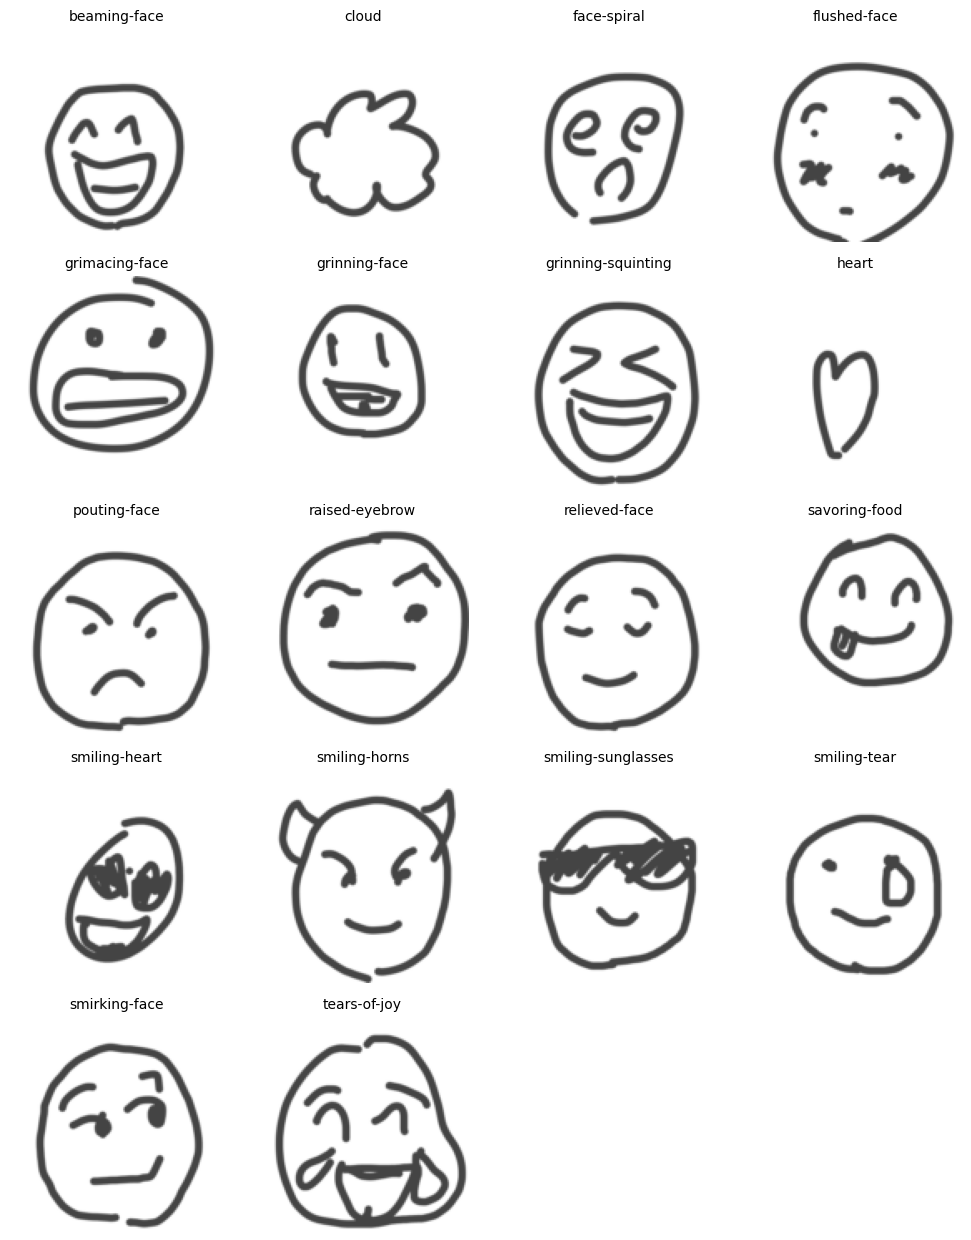

In [ ]:
import os
from PIL import Image
import matplotlib.pyplot as plt

class_names = sorted(os.listdir(data_dir))

num_classes = len(class_names)
cols = 4
rows = 5

plt.figure(figsize=(cols * 2.5, rows * 2.5))

for i, class_name in enumerate(class_names):
    class_path = os.path.join(data_dir, class_name)
    image_file = sorted(os.listdir(class_path))[0]
    img_path = os.path.join(class_path, image_file)

    img = Image.open(img_path)


    if img.mode == 'RGBA':
        background = Image.new("RGB", img.size, (255, 255, 255))
        background.paste(img, mask=img.split()[3])
        img = background
    else:
        img = img.convert("RGB")

    img = img.resize((128, 128), Image.BILINEAR)

    plt.subplot(rows, cols, i + 1)
    plt.imshow(img)
    plt.title(class_name, fontsize=10)
    plt.axis('off')

plt.tight_layout()
plt.show()


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img

augmented_data_dir = "/content/drive/MyDrive/emoji_dataset_augmented_2"

# Number of augmentations per original image
NUM_AUG_PER_IMAGE = 7

# Creating the new directory
os.makedirs(augmented_data_dir, exist_ok=True)

#applying the image augmentation - rotation, shifting, flipping, zooming
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='constant',  # Filling  empty areas with white
    cval=255
)

for class_name in os.listdir(data_dir):
    class_dir = os.path.join(data_dir, class_name)

    if not os.path.isdir(class_dir):
        continue

    save_class_dir = os.path.join(augmented_data_dir, class_name)
    os.makedirs(save_class_dir, exist_ok=True)

    print(f"Processing class: {class_name}")

    for fname in os.listdir(class_dir):
        img_path = os.path.join(class_dir, fname)

        img = load_img(img_path)
        x = img_to_array(img)
        x = np.expand_dims(x, axis=0)

            # Generating and saving augmented images
        i = 0
        for batch in datagen.flow(
            x,
            batch_size=1,
            save_to_dir=save_class_dir,
            save_prefix='aug',
            save_format='png'
            ):
        i ++;
        if i >= NUM_AUG_PER_IMAGE:
            break



Processing class: smiling-heart
Processing class: tears-of-joy
Processing class: grinning-face
Processing class: grinning-squinting
Processing class: smirking-face
Processing class: smiling-horns
Processing class: relieved-face
Processing class: flushed-face
Processing class: heart
Processing class: cloud
Processing class: raised-eyebrow
Processing class: face-spiral
Processing class: smiling-tear
Processing class: savoring-food
Processing class: beaming-face
Processing class: grimacing-face
Processing class: smiling-sunglasses
Processing class: pouting-face


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

augmented_data_dir = "/content/drive/MyDrive/emoji_dataset_augmented_2" #New augmentation dataset when made will be saved here
img_size = (128, 128)
batch_size = 32

datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2  # 80% train, 20% validation
)

train_gen = datagen.flow_from_directory(
    augmented_data_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

val_gen = datagen.flow_from_directory(
    augmented_data_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)


Found 2994 images belonging to 18 classes.
Found 739 images belonging to 18 classes.


In [ ]:
import os

total_images = 0
for class_name in os.listdir(augmented_data_dir):
    class_path = os.path.join(augmented_data_dir, class_name)
    count = len(os.listdir(class_path))
    print(f"{class_name}: {count} images")
    total_images += count

print("Total images:", total_images)


smiling-heart: 207 images
tears-of-joy: 205 images
grinning-face: 204 images
grinning-squinting: 210 images
smirking-face: 208 images
smiling-horns: 208 images
relieved-face: 206 images
flushed-face: 207 images
heart: 209 images
cloud: 207 images
raised-eyebrow: 210 images
face-spiral: 208 images
smiling-tear: 209 images
savoring-food: 208 images
beaming-face: 206 images
grimacing-face: 208 images
smiling-sunglasses: 206 images
pouting-face: 207 images
Total images: 3733


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dropout
#CNN ARCHITECTURE
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=img_size + (3,)),
    MaxPooling2D(2, 2),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Flatten(),#FLATTENING ONTO 1D VECTOR

    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(32, activation='relu'),

    Dense(18, activation='softmax')  # 18 targets classes

])


In [ ]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=10
)


Epoch 1/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 93s 958ms/step - accuracy: 0.8247 - loss: 0.4853 - val_accuracy: 0.5061 - val_loss: 1.7146
Epoch 2/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 89s 947ms/step - accuracy: 0.8644 - loss: 0.3888 - val_accuracy: 0.5115 - val_loss: 1.9311
Epoch 3/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 88s 940ms/step - accuracy: 0.8779 - loss: 0.3698 - val_accuracy: 0.5223 - val_loss: 1.8543
Epoch 4/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 88s 938ms/step - accuracy: 0.8964 - loss: 0.3041 - val_accuracy: 0.5115 - val_loss: 1.9200
Epoch 5/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 88s 937ms/step - accuracy: 0.8960 - loss: 0.3081 - val_accuracy: 0.5196 - val_loss: 1.9339
Epoch 6/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 88s 938ms/step - accuracy: 0.9078 - loss: 0.2848 - val_accuracy: 0.5142 - val_loss: 2.1108
Epoch 7/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 142s 936ms/step - accuracy: 0.9115 - loss: 0.2661 - val_accuracy: 0.5101 - val_loss: 2.0235
Epoch 8/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 88s 938ms/step - accuracy: 0.9310 - loss: 0.2015 - val_acc